<a href="https://colab.research.google.com/github/jainrasik/NYC-Taxi-Trip-Time-Prediction-Rasik-Jain/blob/main/NYC_Taxi_Trip_Time_Prediction_rasik_jain_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [5]:
# importing all the neccessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from datetime import datetime
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# mounting the drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Reading the file from drive and converting to Dataframe
dir='/content/drive/MyDrive/Colab Notebooks/data files/'
df=pd.read_csv(dir+'NYC Taxi Data.csv')

In [7]:
# checking the data
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [8]:
df.shape

(1458644, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [10]:
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['dropoff_datetime'] = df['dropoff_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [11]:
df.iloc[:,9].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [38]:
df.drop('id',axis=1,inplace=True)

In [12]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [13]:
numerical_feature=df.describe().columns
numerical_feature

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

In [14]:
dependent_variable='trip_duration'

In [15]:
independent_numerical_varaible=set(numerical_feature)-{'trip_duration','passenger_count','vendor_id'}
independent_numerical_varaible

{'dropoff_latitude',
 'dropoff_longitude',
 'pickup_latitude',
 'pickup_longitude'}

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


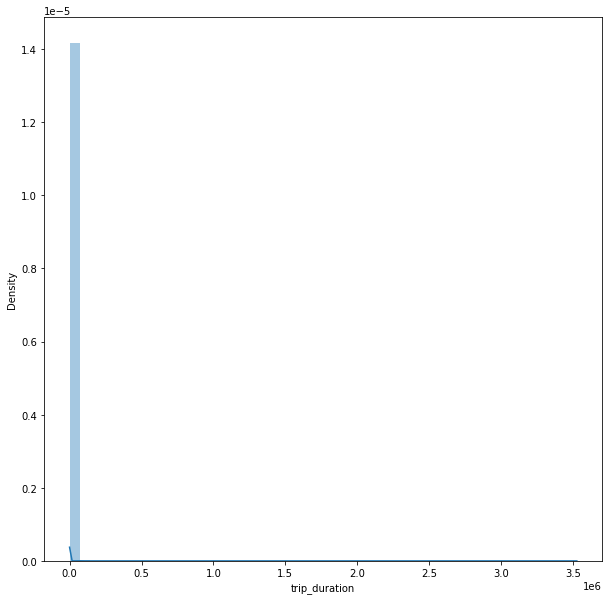

In [16]:
plt.figure(figsize=[10,10])
sns.distplot(df[dependent_variable])

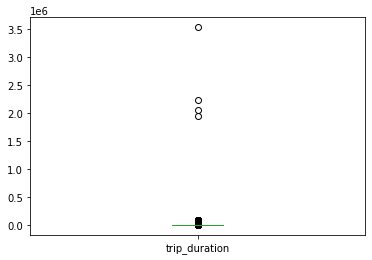

In [17]:
df['trip_duration'].plot(kind='box')

In [18]:
def calculate_trip_duration(pickup,dropoff):
    return (dropoff-pickup).seconds

In [19]:
df['calculate_trip_duration']=df.apply(lambda x: calculate_trip_duration(x['pickup_datetime'],x['dropoff_datetime']),axis=1)

In [68]:
(df['calculate_trip_duration']==df['trip_duration']).value_counts()

True     1458640
False          4
dtype: int64

In [20]:
df[df['calculate_trip_duration']!=df['trip_duration']]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,calculate_trip_duration
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,38936
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,62378
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,67612
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,70282


In [21]:
df.drop(['dropoff_datetime','pickup_datetime','trip_duration'],axis=1,inplace=True)

In [23]:
numerical_feature=set(df.describe().columns)-{'passenger_count','vendor_id'}
dependent_variable='calculate_trip_duration'
independent_numerical_varaible=set(numerical_feature)-{'calculate_trip_duration'}


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'with Transormation')

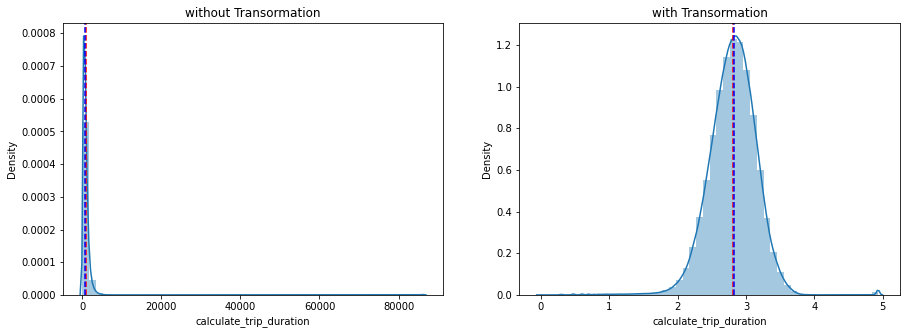

In [24]:
fig=plt.figure(figsize=[15,5])
x=df[dependent_variable]
y=np.log10(df[dependent_variable])
plt.subplot(121)
sns.distplot(x)
ax=fig.gca()
ax.axvline(x.mean(),color='red',linestyle='dashed')
ax.axvline(x.median(),color='blue',linestyle='dashed')
ax.set_title('without Transormation')
plt.subplot(122)
sns.distplot(y)
ax=fig.gca()
ax.axvline(y.mean(),color='red',linestyle='dashed')
ax.axvline(y.median(),color='blue',linestyle='dashed')
ax.set_title('with Transormation')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

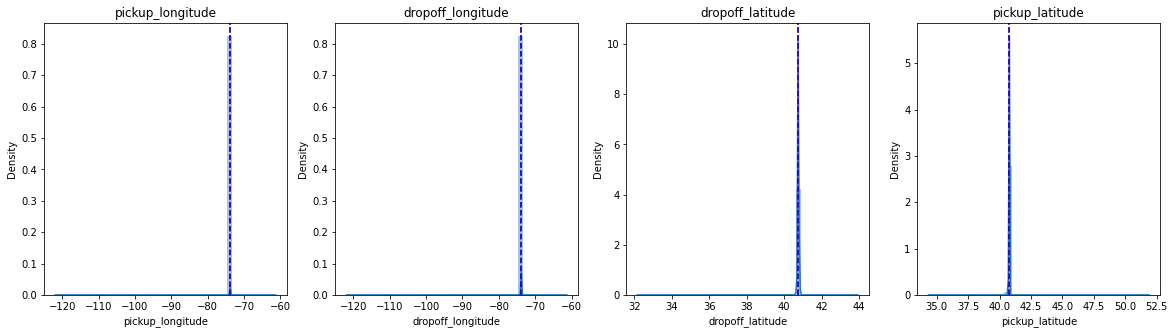

In [25]:
fig=plt.figure(figsize=[20,5])
for i,col in enumerate(independent_numerical_varaible):
  plt.subplot(1,4,i+1)
  sns.distplot(df[col])
  ax=fig.gca()
  ax.axvline(df[col].mean(),color='red',linestyle='dashed')
  ax.axvline(df[col].median(),color='blue',linestyle='dashed')
  ax.set_title(col)

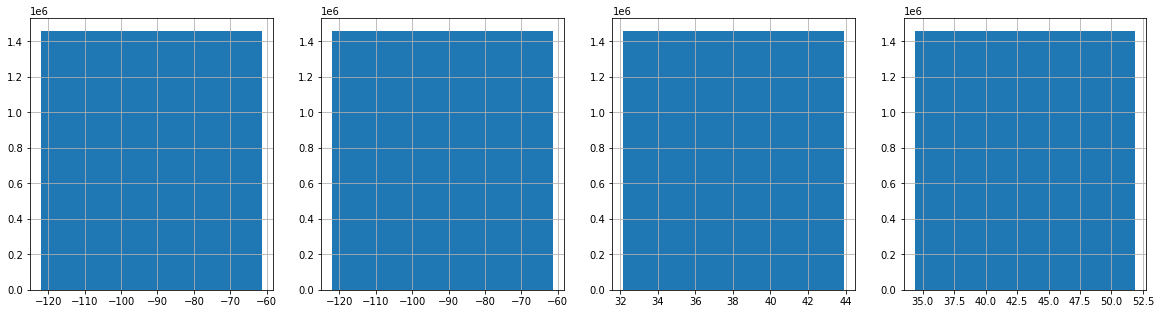

In [26]:
fig=plt.figure(figsize=[20,5])
for i,col in enumerate(independent_numerical_varaible):
  plt.subplot(1,4,i+1)
  df[col].hist(bins=1)

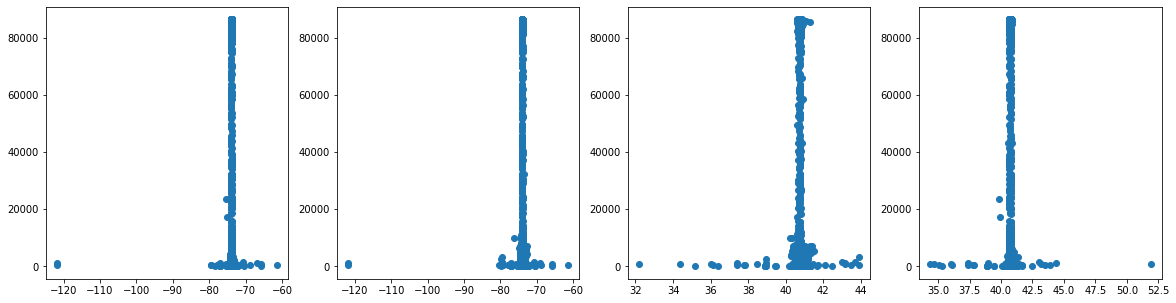

In [27]:
fig=plt.figure(figsize=[20,5])
for i,col in enumerate(independent_numerical_varaible):
  plt.subplot(1,4,i+1)
  plt.scatter(df[col],df[dependent_variable])


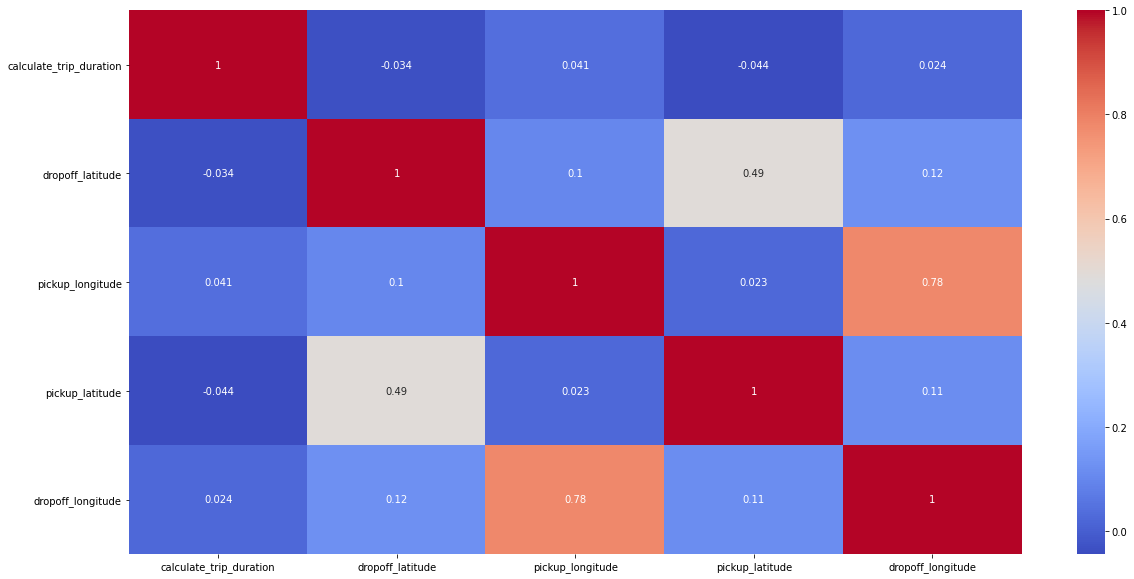

In [28]:
plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(df[numerical_feature].corr(),annot=True,cmap='coolwarm')

In [29]:
def calvif(x):
  vif=pd.DataFrame()
  vif['feature']= x.columns
  vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return vif
   

In [30]:
calvif(df[independent_numerical_varaible])

,feature,vif
0,pickup_longitude,2.812857e+06
1,dropoff_longitude,2.641270e+06
2,dropoff_latitude,1.474444e+06
3,pickup_latitude,1.681253e+06


In [31]:
def ecludean_distance(x1,x2,y1,y2):
  return math.sqrt((x1-x2)**2+(y1-y2)**2)

In [32]:
df['ecludean_distance']=df.apply(lambda x: ecludean_distance(x['pickup_latitude'],x['dropoff_latitude'],x['pickup_longitude'],x['dropoff_longitude']),axis=1)

In [33]:
df.drop(['pickup_latitude','dropoff_latitude','pickup_longitude','dropoff_longitude'],axis=1,inplace=True)

In [34]:
df.head()

,id,vendor_id,passenger_count,store_and_fwd_flag,calculate_trip_duration,ecludean_distance
0,id2875421,2,1,N,455,0.017680
1,id2377394,1,1,N,663,0.020456
2,id3858529,2,1,N,2124,0.059934
3,id3504673,2,1,N,429,0.013438
4,id2181028,2,1,N,435,0.010690


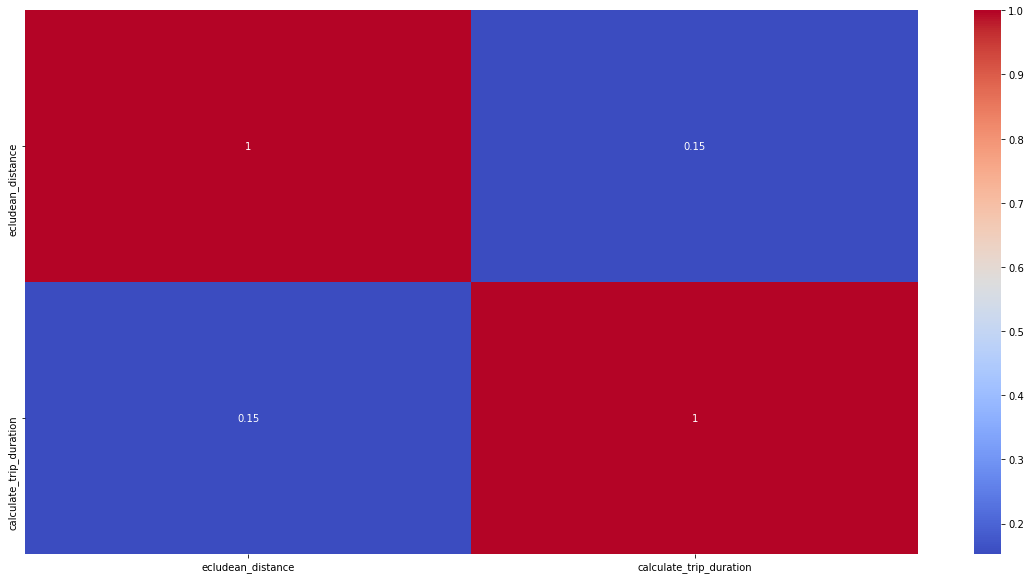

In [36]:
numerical_feature=set(df.describe().columns)-{'passenger_count','vendor_id'}
dependent_variable='calculate_trip_duration'
independent_numerical_varaible=set(numerical_feature)-{'calculate_trip_duration'}
plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(df[numerical_feature].corr(),annot=True,cmap='coolwarm')

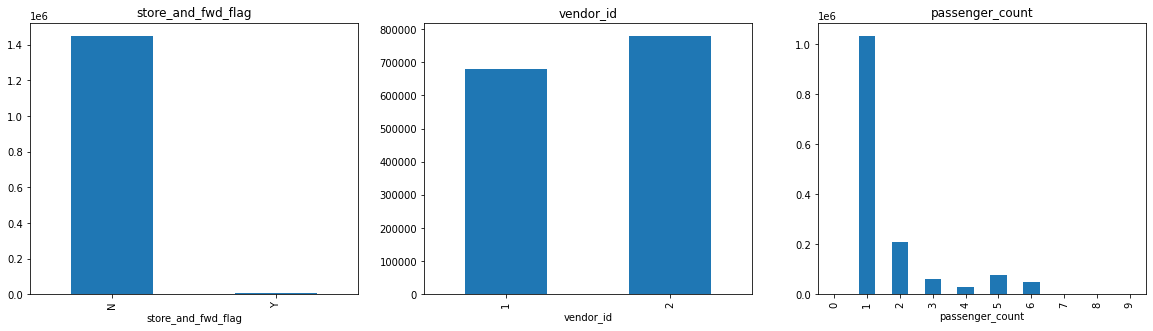

In [44]:
fig=plt.figure(figsize=[20,5])
categorical_variable=set(df.columns)-numerical_feature
for i,col in enumerate(categorical_variable):
  plt.subplot(1,3,i+1)
  df.groupby(col)[col].count().plot(kind='bar')
  plt.title(col)

In [46]:
df.drop('store_and_fwd_flag',axis=1,inplace=True)

In [47]:
df.head()

,vendor_id,passenger_count,calculate_trip_duration,ecludean_distance
0,2,1,455,0.017680
1,1,1,663,0.020456
2,2,1,2124,0.059934
3,2,1,429,0.013438
4,2,1,435,0.010690


In [50]:
df=pd.get_dummies(df,columns=['vendor_id'])

In [51]:
dependent_variable='calculate_trip_duration'
independent_varaible=list(set(df.columns)-{'calculate_trip_duration'})

In [104]:
X=df[independent_varaible].values

In [105]:
y=np.log10(df[dependent_variable])


In [107]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)
scaler=MinMaxScaler()
print(xtrain)
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)
xtrain

[[1.         0.00239538 0.         1.        ]
 [0.         0.01044939 1.         1.        ]
 [1.         0.06151446 0.         1.        ]
 ...
 [1.         0.05582432 0.         1.        ]
 [1.         0.01156306 0.         1.        ]
 [0.         0.01763233 1.         2.        ]]


array([[1.00000000e+00, 2.58720596e-04, 0.00000000e+00, 1.11111111e-01],
       [0.00000000e+00, 1.12862028e-03, 1.00000000e+00, 1.11111111e-01],
       [1.00000000e+00, 6.64407031e-03, 0.00000000e+00, 1.11111111e-01],
       ...,
       [1.00000000e+00, 6.02948783e-03, 0.00000000e+00, 1.11111111e-01],
       [1.00000000e+00, 1.24890574e-03, 0.00000000e+00, 1.11111111e-01],
       [0.00000000e+00, 1.90443736e-03, 1.00000000e+00, 2.22222222e-01]])

In [108]:
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)
regressor.intercept_
regressor.coef_

array([-4.56645111e+11,  4.14202271e+01, -4.56645111e+11,  2.83508301e-02])

In [97]:
ypred=regressor.predict(xtest)

In [109]:
regressor.score(xtrain,ytrain)

0.3363073582392937

In [111]:
mean_squared_error(ytest,ypred)

0.08846926756070855

In [112]:
r2_score(ytest,ypred)

0.26286407667932166

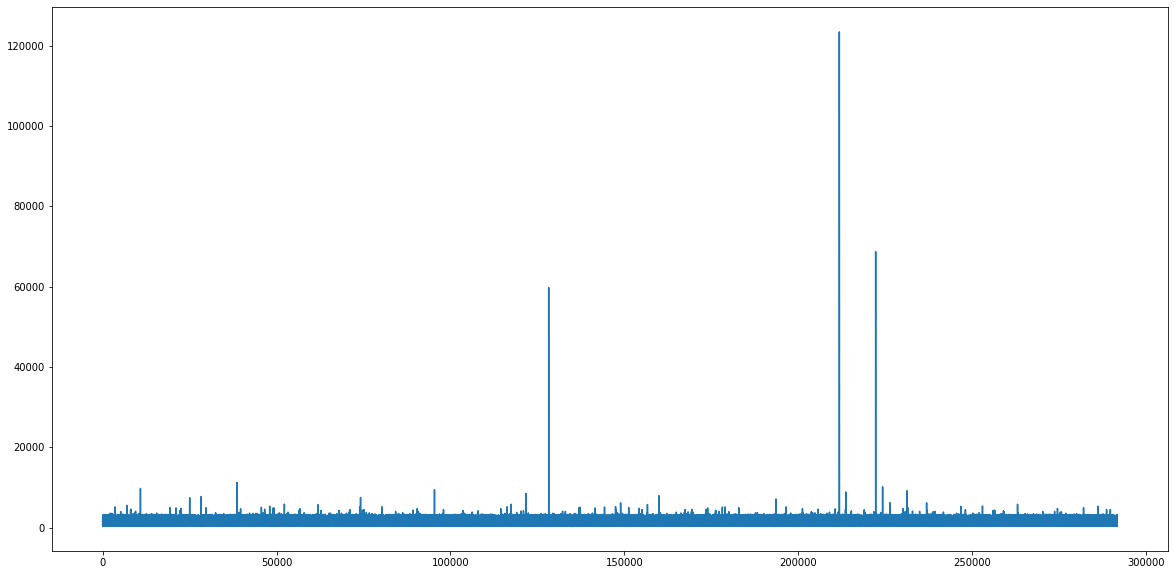